In [1]:
from helper import*
from params import*
from zipfile import ZipFile
from os import walk

In [3]:
def zipExtract(filenames,localDirectory,destDirectory,variableName):
    print("\n")
    print("zip files in "+ variableName+":")
    def zipExt(filename,localDirectory,destDirectory,variableName):
        zf = ZipFile(localDirectory+filename, 'r')
        path = destDirectory+variableName
        zf.extractall(path)
        zf.close()
    zipOutputs = []
    for filename in filenames:
        zipOutputs.append(zipExt(filename,localDirectory,destDirectory,variableName))
        print(filename)
    files_dest = next(walk(destDirectory+variableName), (None, None, []))[2]
    files_dest = [f for f in files_dest if f.endswith('.csv')]
    resampled_data = []
    for I in range(len(files_dest)):
        resampled_data.append((pd.read_csv(destDirectory+variableName+'/'+files_dest[I]))[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']])
    resampled_data = np.array(resampled_data)
    resampled_data = resampled_data.reshape(resampled_data.shape[1],resampled_data.shape[2])
    mean = np.nanmean(resampled_data, axis=0)
    idx = np.where(np.isnan(resampled_data))
    resampled_data[idx] = np.take(mean, idx[1])
    print("\n")
    print(variableName + " zip files contents:")
    print(files_dest)
    return files_dest,resampled_data

In [4]:
M = [["MH_01_ES1_task1.zip"],["MH_02_ES1_task1.zip"]]
localDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/"
destDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/dest/"

print(M[0])

['MH_01_ES1_task1.zip']




zip files in M11:
MH_01_ES1_task1.zip


M11 zip files contents:
['mindMonitor_2021-06-03--15-34-12.csv']


zip files in M12:
MH_02_ES1_task1.zip


M12 zip files contents:
['mindMonitor_2021-06-11--13-23-14.csv']


/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 1024 is greater than input length  = 187, using nperseg = 187
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/joshuaighalo/Documents/GitHub/Music-Therapy-EEG-Analysis/helper.py:358: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=187).
  d, f, t, im = axs.specgram(data[:,i],NFFT=nfft,Fs=fs,noverlap=nOverlap)


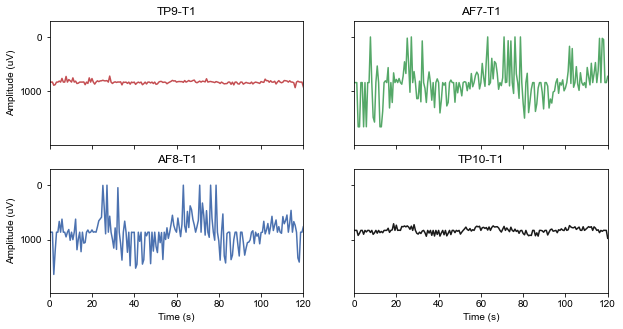

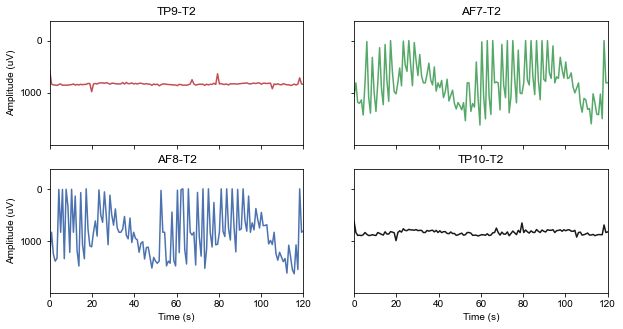

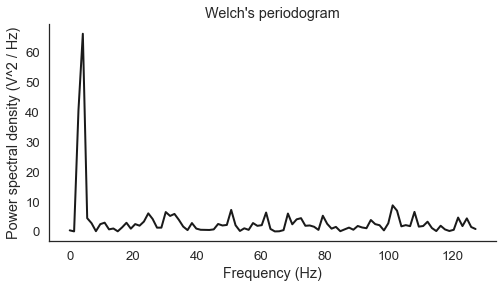

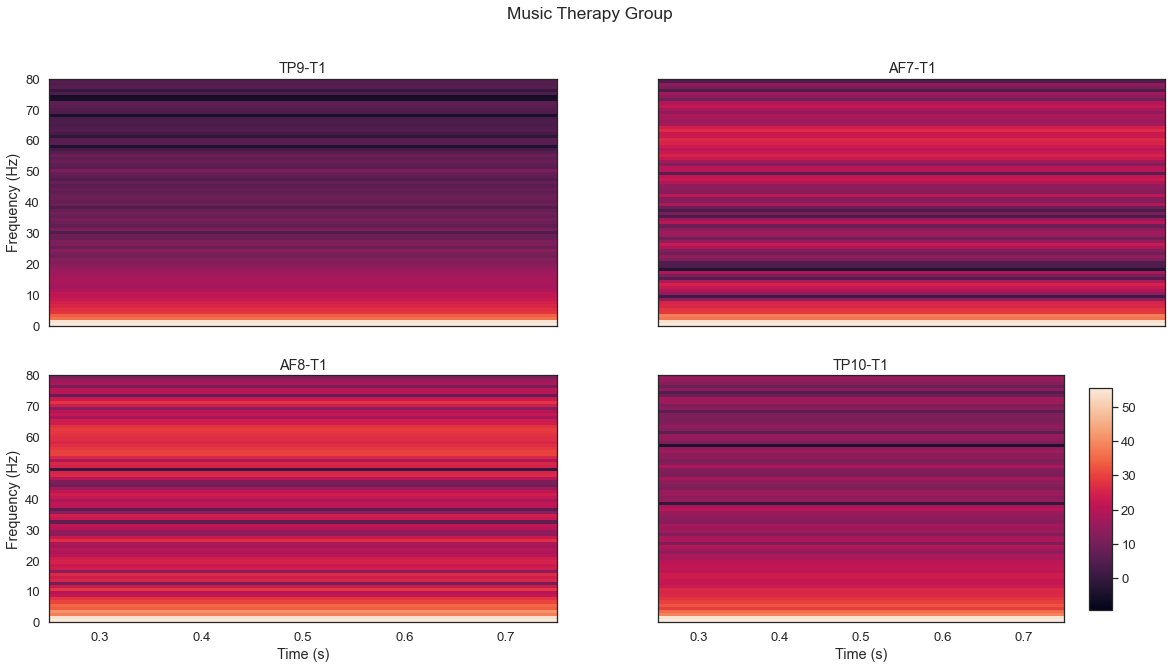

In [5]:
# transform sql extracted table to raw eeg data
os.system('rm -rf %s/*' % destDir)
rawEEG_1 = zipExtract(M[0],localDir,destDir,"M11")[1]
rawEEG_2 = zipExtract(M[1],localDir,destDir,"M12")[1]
time_1 = np.linspace(0,120,len(rawEEG_1))
time_2 = np.linspace(0,120,len(rawEEG_2))
plots(time_1,rawEEG_1,['TP9-T1','AF7-T1','AF8-T1','TP10-T1'],(10,5),['r','g','b','k'])
#spectogramPlot(rawEEG_1,fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1'],'Music Therapy Group')
plots(time_2,rawEEG_2,['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],(10,5),['r','g','b','k'])
#spectogramPlot(rawEEG_2,fs,nfft,noverlap,(20,10),['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group')

psdPlots(rawEEG_1[:,0],fs)
spectogramPlot(rawEEG_1,fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1'],'Music Therapy Group')


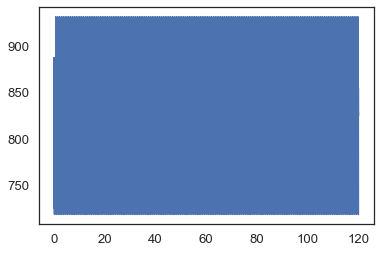

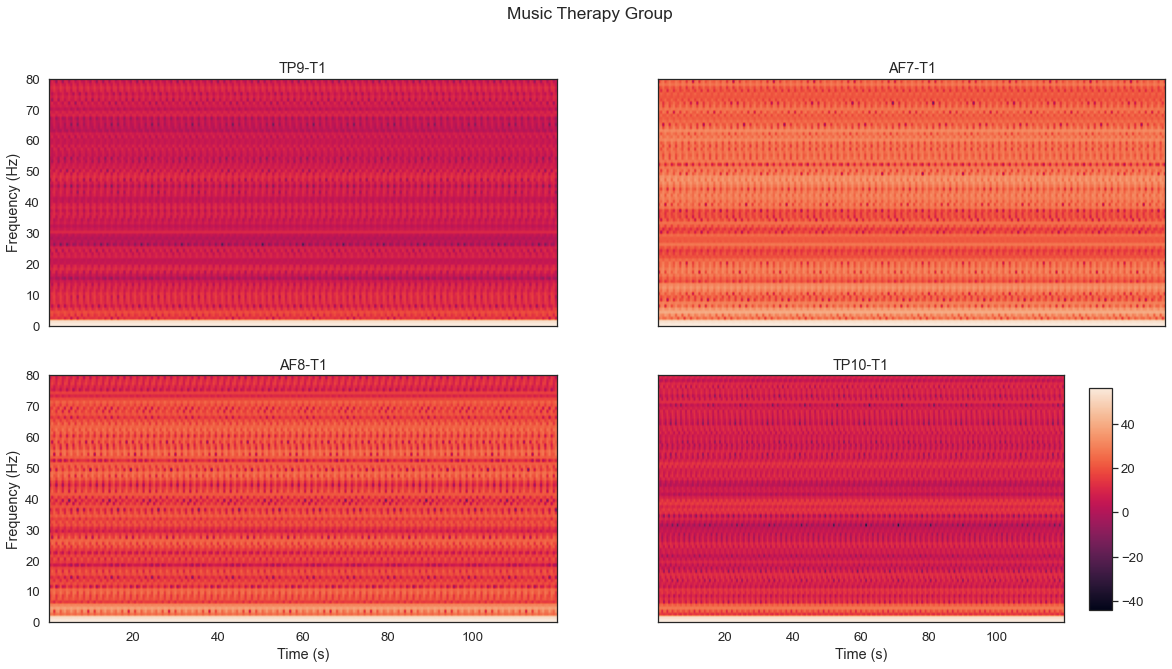

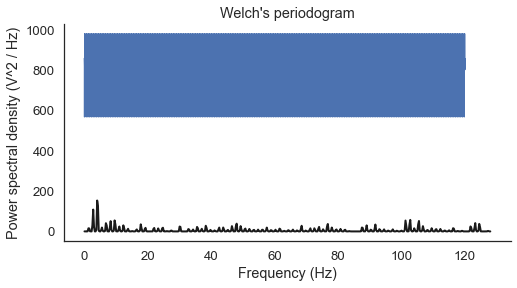

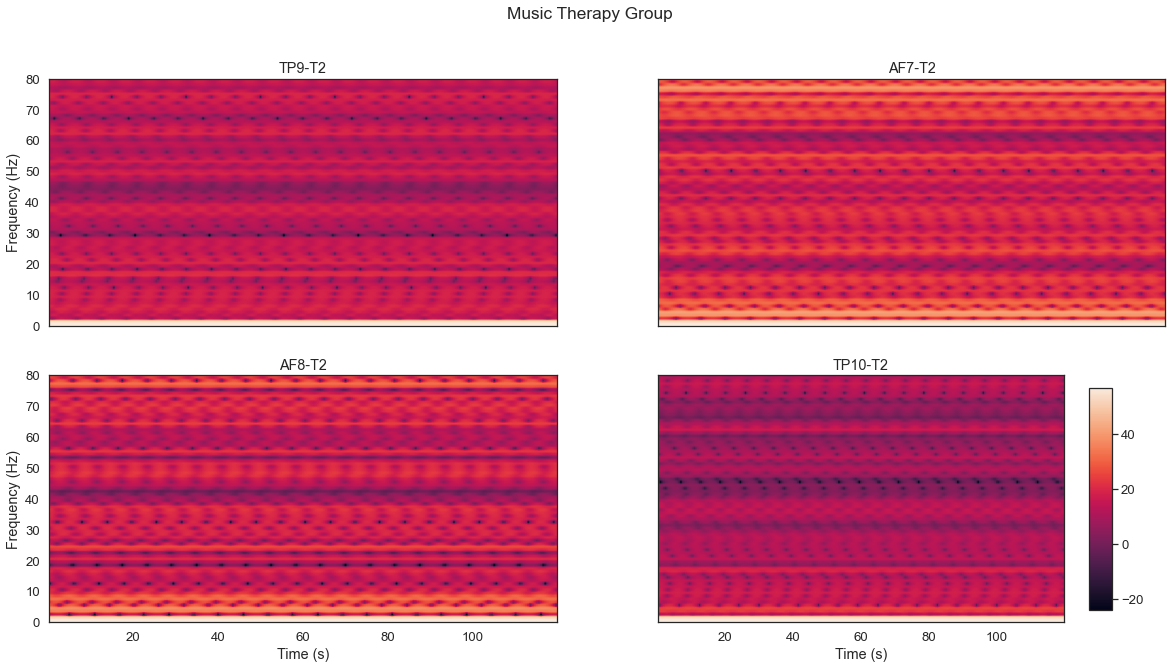

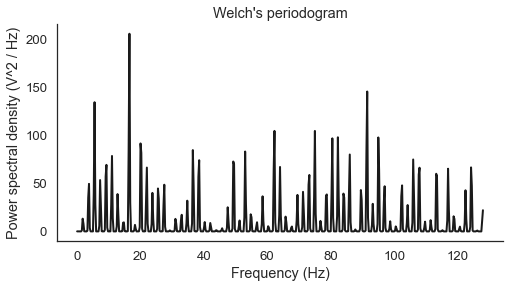

In [6]:
test_1 = np.tile(rawEEG_1, (30720, 1))
test_1 = test_1[:30720]
time = np.linspace(0,120,len(test_1))
plt.plot(time,test_1[:,0])
plt.show()
spectogramPlot(test_1,fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1'],'Music Therapy Group')
psdPlots(test_1[:,0],fs)


In [ ]:
test_2 = np.tile(rawEEG_2, (30720, 1))
test_2 = test_2[:30720]
plt.plot(time,test_2[:,0])
plt.show()
spectogramPlot(test_2,fs,nfft,noverlap,(20,10),['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group')
psdPlots(test_2[:,0],fs)

In [ ]:
wavelet = ['sym3']
dwtEEG_1 = multiChannelDWT(test_1,time,wavelet)
plots(time,dwtEEG_1,['TP9-T1','AF7-T1','AF8-T1','TP10-T1'],(10,5),['r','g','b','k'])
spectogramPlot(dwtEEG_1,fs,nfft,noverlap,(20,10),['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group')
psdPlots(dwtEEG_1[:,0],fs)
psdPlots(dwtEEG_1[:,1],fs)
psdPlots(dwtEEG_1[:,2],fs)
psdPlots(dwtEEG_1[:,3],fs)

In [ ]:
dwtEEG_2 = multiChannelDWT(test_2,time,wavelet)
plots(time,dwtEEG_2,['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],(10,5),['r','g','b','k'])
spectogramPlot(dwtEEG_2,fs,nfft,noverlap,(20,10),['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group')
psdPlots(dwtEEG_2[:,0],fs)
psdPlots(dwtEEG_2[:,1],fs)
psdPlots(dwtEEG_2[:,2],fs)
psdPlots(dwtEEG_2[:,3],fs)

In [ ]:
filtering = filters()
filteredEEG_1 = filtering.notch(dwtEEG_1,60,fs,Q)
plots(time,filteredEEG_1,['TP9-T1','AF7-T1','AF8-T1','TP10-T1'],(10,5),['r','g','b','k'])
spectogramPlot(filteredEEG_1,fs,nfft,noverlap,(20,10),['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group')
psdPlots(filteredEEG_1[:,0],fs)
psdPlots(filteredEEG_1[:,1],fs)
psdPlots(filteredEEG_1[:,2],fs)
psdPlots(filteredEEG_1[:,3],fs)

In [ ]:
filteredEEG_2 = filtering.notch(dwtEEG_2,60,fs,Q)
plots(time,filteredEEG_2,['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],(10,5),['r','g','b','k'])
spectogramPlot(filteredEEG_2,fs,nfft,noverlap,(20,10),['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group')
psdPlots(filteredEEG_2[:,0],fs)
psdPlots(filteredEEG_2[:,1],fs)
psdPlots(filteredEEG_2[:,2],fs)
psdPlots(filteredEEG_2[:,3],fs)

In [ ]:
ica_1 = customICA(filteredEEG_1,1)
plots(time,ica_1,['TP9-T1','AF7-T1','AF8-T1','TP10-T1'],(10,5),['r','g','b','k'])
spectogramPlot(ica_1,fs,nfft,noverlap,(20,10),['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group')
psdPlots(ica_1[:,0],fs)
psdPlots(ica_1[:,1],fs)
psdPlots(ica_1[:,2],fs)
psdPlots(ica_1[:,3],fs)

In [ ]:
ica_2 = customICA(filteredEEG_2,1)
plots(time,ica_2,['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],(10,5),['r','g','b','k'])
spectogramPlot(ica_2,fs,nfft,noverlap,(20,10),['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group')
psdPlots(ica_2[:,0],fs)
psdPlots(ica_2[:,1],fs)
psdPlots(ica_2[:,2],fs)
psdPlots(ica_2[:,3],fs)

In [ ]:

filtering = filters()
bpData_1 = filtering.butterBandPass(ica_1,0.1,100,fs,order)
plots(time,bpData_1,['TP9-T1','AF7-T1','AF8-T1','TP10-T1'],(10,5),['r','g','b','k'])
spectogramPlot(bpData_1,fs,nfft,noverlap,(20,10),['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group')
psdPlots(bpData_1[:,0],fs)
psdPlots(bpData_1[:,1],fs)
psdPlots(bpData_1[:,2],fs)
psdPlots(bpData_1[:,3],fs)

In [ ]:
bpData_2 = filtering.butterBandPass(ica_2,0.1,100,fs,order)
plots(time,bpData_2,['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],(10,5),['r','g','b','k'])
spectogramPlot(bpData_2,fs,nfft,noverlap,(20,10),['TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group')
psdPlots(bpData_2[:,0],fs)
psdPlots(bpData_2[:,1],fs)
psdPlots(bpData_2[:,2],fs)
psdPlots(bpData_2[:,3],fs)

In [ ]:
# compute power spectrum of each window per channel
delta_low = brainwaves['delta'][0]
delta_high = brainwaves['delta'][1]
theta_low = brainwaves['theta'][0]
theta_high = brainwaves['theta'][1]
alpha_low = brainwaves['alpha'][0]
alpha_high = brainwaves['alpha'][1]
beta_low = brainwaves['beta'][0]
beta_high = brainwaves['beta'][1]
gamma_low = brainwaves['gamma'][0]
gamma_high = brainwaves['gamma'][1]

# compute average band power for timepoint 1
deltaAvgBandPower_1 = averageBandPower(bpData_1,'2D',fs,delta_low,delta_high,win)
thetaAvgBandPower_1 = averageBandPower(bpData_1,'2D',fs,theta_low,theta_high,win)
alphaAvgBandPower_1 = averageBandPower(bpData_1,'2D',fs,alpha_low,alpha_high,win)
betaAvgBandPower_1 = averageBandPower(bpData_1,'2D',fs,beta_low,beta_high,win)
gammaAvgBandPower_1 = averageBandPower(bpData_1,'2D',fs,gamma_low,gamma_high,win)

# compute average band power for timepoint 2
deltaAvgBandPower_2 = averageBandPower(bpData_2,'2D',fs,delta_low,delta_high,win)
thetaAvgBandPower_2 = averageBandPower(bpData_2,'2D',fs,theta_low,theta_high,win)
alphaAvgBandPower_2 = averageBandPower(bpData_2,'2D',fs,alpha_low,alpha_high,win)
betaAvgBandPower_2 = averageBandPower(bpData_2,'2D',fs,beta_low,beta_high,win)
gammaAvgBandPower_2 = averageBandPower(bpData_2,'2D',fs,gamma_low,gamma_high,win)

In [ ]:
data_pre = np.vstack((deltaAvgBandPower_1,thetaAvgBandPower_1,alphaAvgBandPower_1,betaAvgBandPower_1,gammaAvgBandPower_1))
data_post = np.vstack((deltaAvgBandPower_2,thetaAvgBandPower_2,alphaAvgBandPower_2,betaAvgBandPower_2,gammaAvgBandPower_2))
                    
data_pre = np.hstack((data_pre[:,0],data_pre[:,1],data_pre[:,2],data_pre[:,3]))
data_post = np.hstack((data_post[:,0],data_post[:,1],data_post[:,2],data_post[:,3]))
diff = data_pre - data_post
test = normalityTest(diff)